In [138]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# 1. Importing the data

In [139]:
df = pd.read_csv("Leads.csv")

In [140]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [141]:
df.shape

(9240, 37)

In [142]:
df.size

341880

In [143]:
pd.set_option('display.max_columns',100)

In [144]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [145]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [147]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# There are null values in the data.

# 2. Cleaning the data

In [148]:
round(df.isnull().sum()/len(df)*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [149]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### There are lot of missing values in the data. Since the data is big, dropping the columns who are more than= 35% missing values in the data.

In [150]:
for col in df.columns:
    if df[col].isnull().sum()>3000:
        df.drop(col,axis=1,inplace=True)

In [151]:
df.shape

(9240, 31)

In [152]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [153]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [154]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Checking the percentage of missing values.

In [155]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Already a hint is given in the problem statement to check the select catergory in the data. Checking on select value on all categorical variables.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [157]:
for col in df:
    print(df[col].astype('category').value_counts())
    print('*******************************************')
    

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
*******************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
*******************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**********************************

### Specialization, How did you hear about X Education, Lead Profile varaibles have select values in them.

In [158]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [159]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [160]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

###  Replacing select values to nan

In [161]:
df = df.replace('Select',np.nan)

In [162]:
df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [163]:
df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [164]:
# Checking unique values in the data
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Dropping the columns with unique values

In [165]:
df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [166]:
df.shape

(9240, 26)

In [167]:
round(df.isnull().sum()/len(df)*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums          

### Deleting unwanted columns

In [168]:
df.drop(['Lead Number', 'Lead Profile','City','How did you hear about X Education', 'Lead Number'],axis=1,inplace=True)

In [169]:
df.shape

(9240, 22)

In [170]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### There are lot of null values in the above data. We cannot lose lot of data so, replacing the missing values with Unknown

In [171]:
df['Specialization'] = df['Specialization'].fillna('Unknown') 
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [172]:
df.tail()

Prospect ID              Lead Origin  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
9235  Direct Traffic          Yes          No          1          8.0   
9236  Direct Traffic           No          No          0          2.0   
9237  Direct Traffic          Yes          No          0          2.0   
9238          Google           No          No          1          3.0   
9239  Direct Traffic           No          No          1          6.0   

      Total Time Spent on Website  Page Views Per Visit      Last Activity  \
9235                         1845                  2.67  Email Marked Spam   
9236                          238                  2.00           SMS Sent   
9237                          199                  2.00           SMS Sent   
9238                          499                  3.00           SMS Sent   
9239                         1279                  3.00           SMS Sent   

           Country             Specialization What is your current occupation  \
9235  Saudi Arabia     IT Projects Management                      Unemployed   
9236         India      Media and Advertising                      Unemployed   
9237         India    Business Administration                      Unemployed   
9238         India  Human Resource Management                         Unknown   
9239    Bangladesh    Supply Chain Management                      Unemployed   

     What matters most to you in choosing a course Search Newspaper Article  \
9235                       Better Career Prospects     No                No   
9236                       Better Career Prospects     No                No   
9237                       Better Career Prospects     No                No   
9238                                       Unknown     No                No   
9239                       Better Career Prospects     No                No   

     X Education Forums Newspaper Digital Advertisement  \
9235                 No        No                    No   
9236                 No        No                    No   
9237                 No        No                    No   
9238                 No        No                    No   
9239                 No        No                    No   

     Through Recommendations A free copy of Mastering The Interview  \
9235                      No                                     No   
9236                      No                                    Yes   
9237                      No                                    Yes   
9238                      No                                     No   
9239                      No                                    Yes   

     Last Notable Activity  
9235     Email Marked Spam  
9236              SMS Sent  
9237              SMS Sent  
9238              SMS Sent  
9239              Modified

### CHecking the percentage of missing values again

In [173]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [174]:
## Checking the value counts of Country varaible

df['Country'].value_counts()

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [175]:
def var(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Unknown":
        category = "Unknown"
    else:
        category = "Outside India"
    return category

df['Country'] = df.apply(lambda x:var(x['Country']), axis = 1)
df['Country'].value_counts()

India            6492
Unknown          2461
Outside India     287
Name: Country, dtype: int64

### Since there are few missing values still in data, moving all the data row which has less than 1 null values

In [176]:
df_2 = df[df.isnull().sum(axis=1) <1]

In [177]:
df_2.shape

(9074, 22)

In [178]:
round(100*(df_2.isnull().sum()/len(df_2.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Now, the data has 0 null values. Also, removing Prospect ID as it is unique and not useful in the analysis.

In [179]:
df_2.drop('Prospect ID',axis=1,inplace=True)

In [180]:
df_2.shape

(9074, 21)

# 3. Exploratory Data Analysis(EDA)

In [181]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

### There are 17 categorical variables and 4 numeric variables.

# Univariate Analysis on categrorical variables

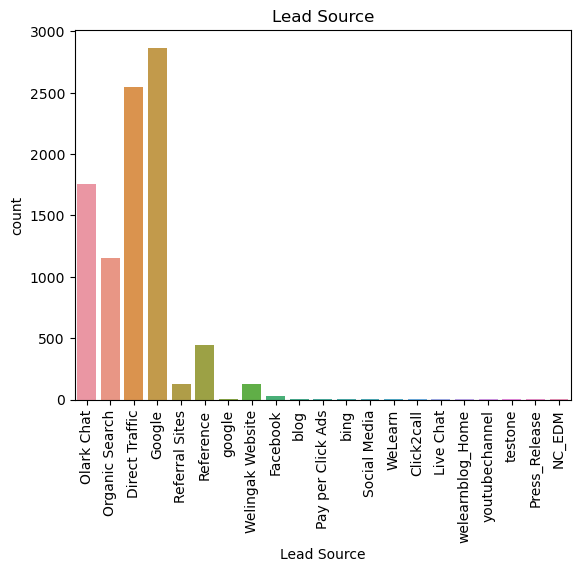

In [182]:
sns.countplot(x='Lead Source',data=df_2)
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()

## Inference

##### Most of the customers has known about the platform via Google and then by direct traffic

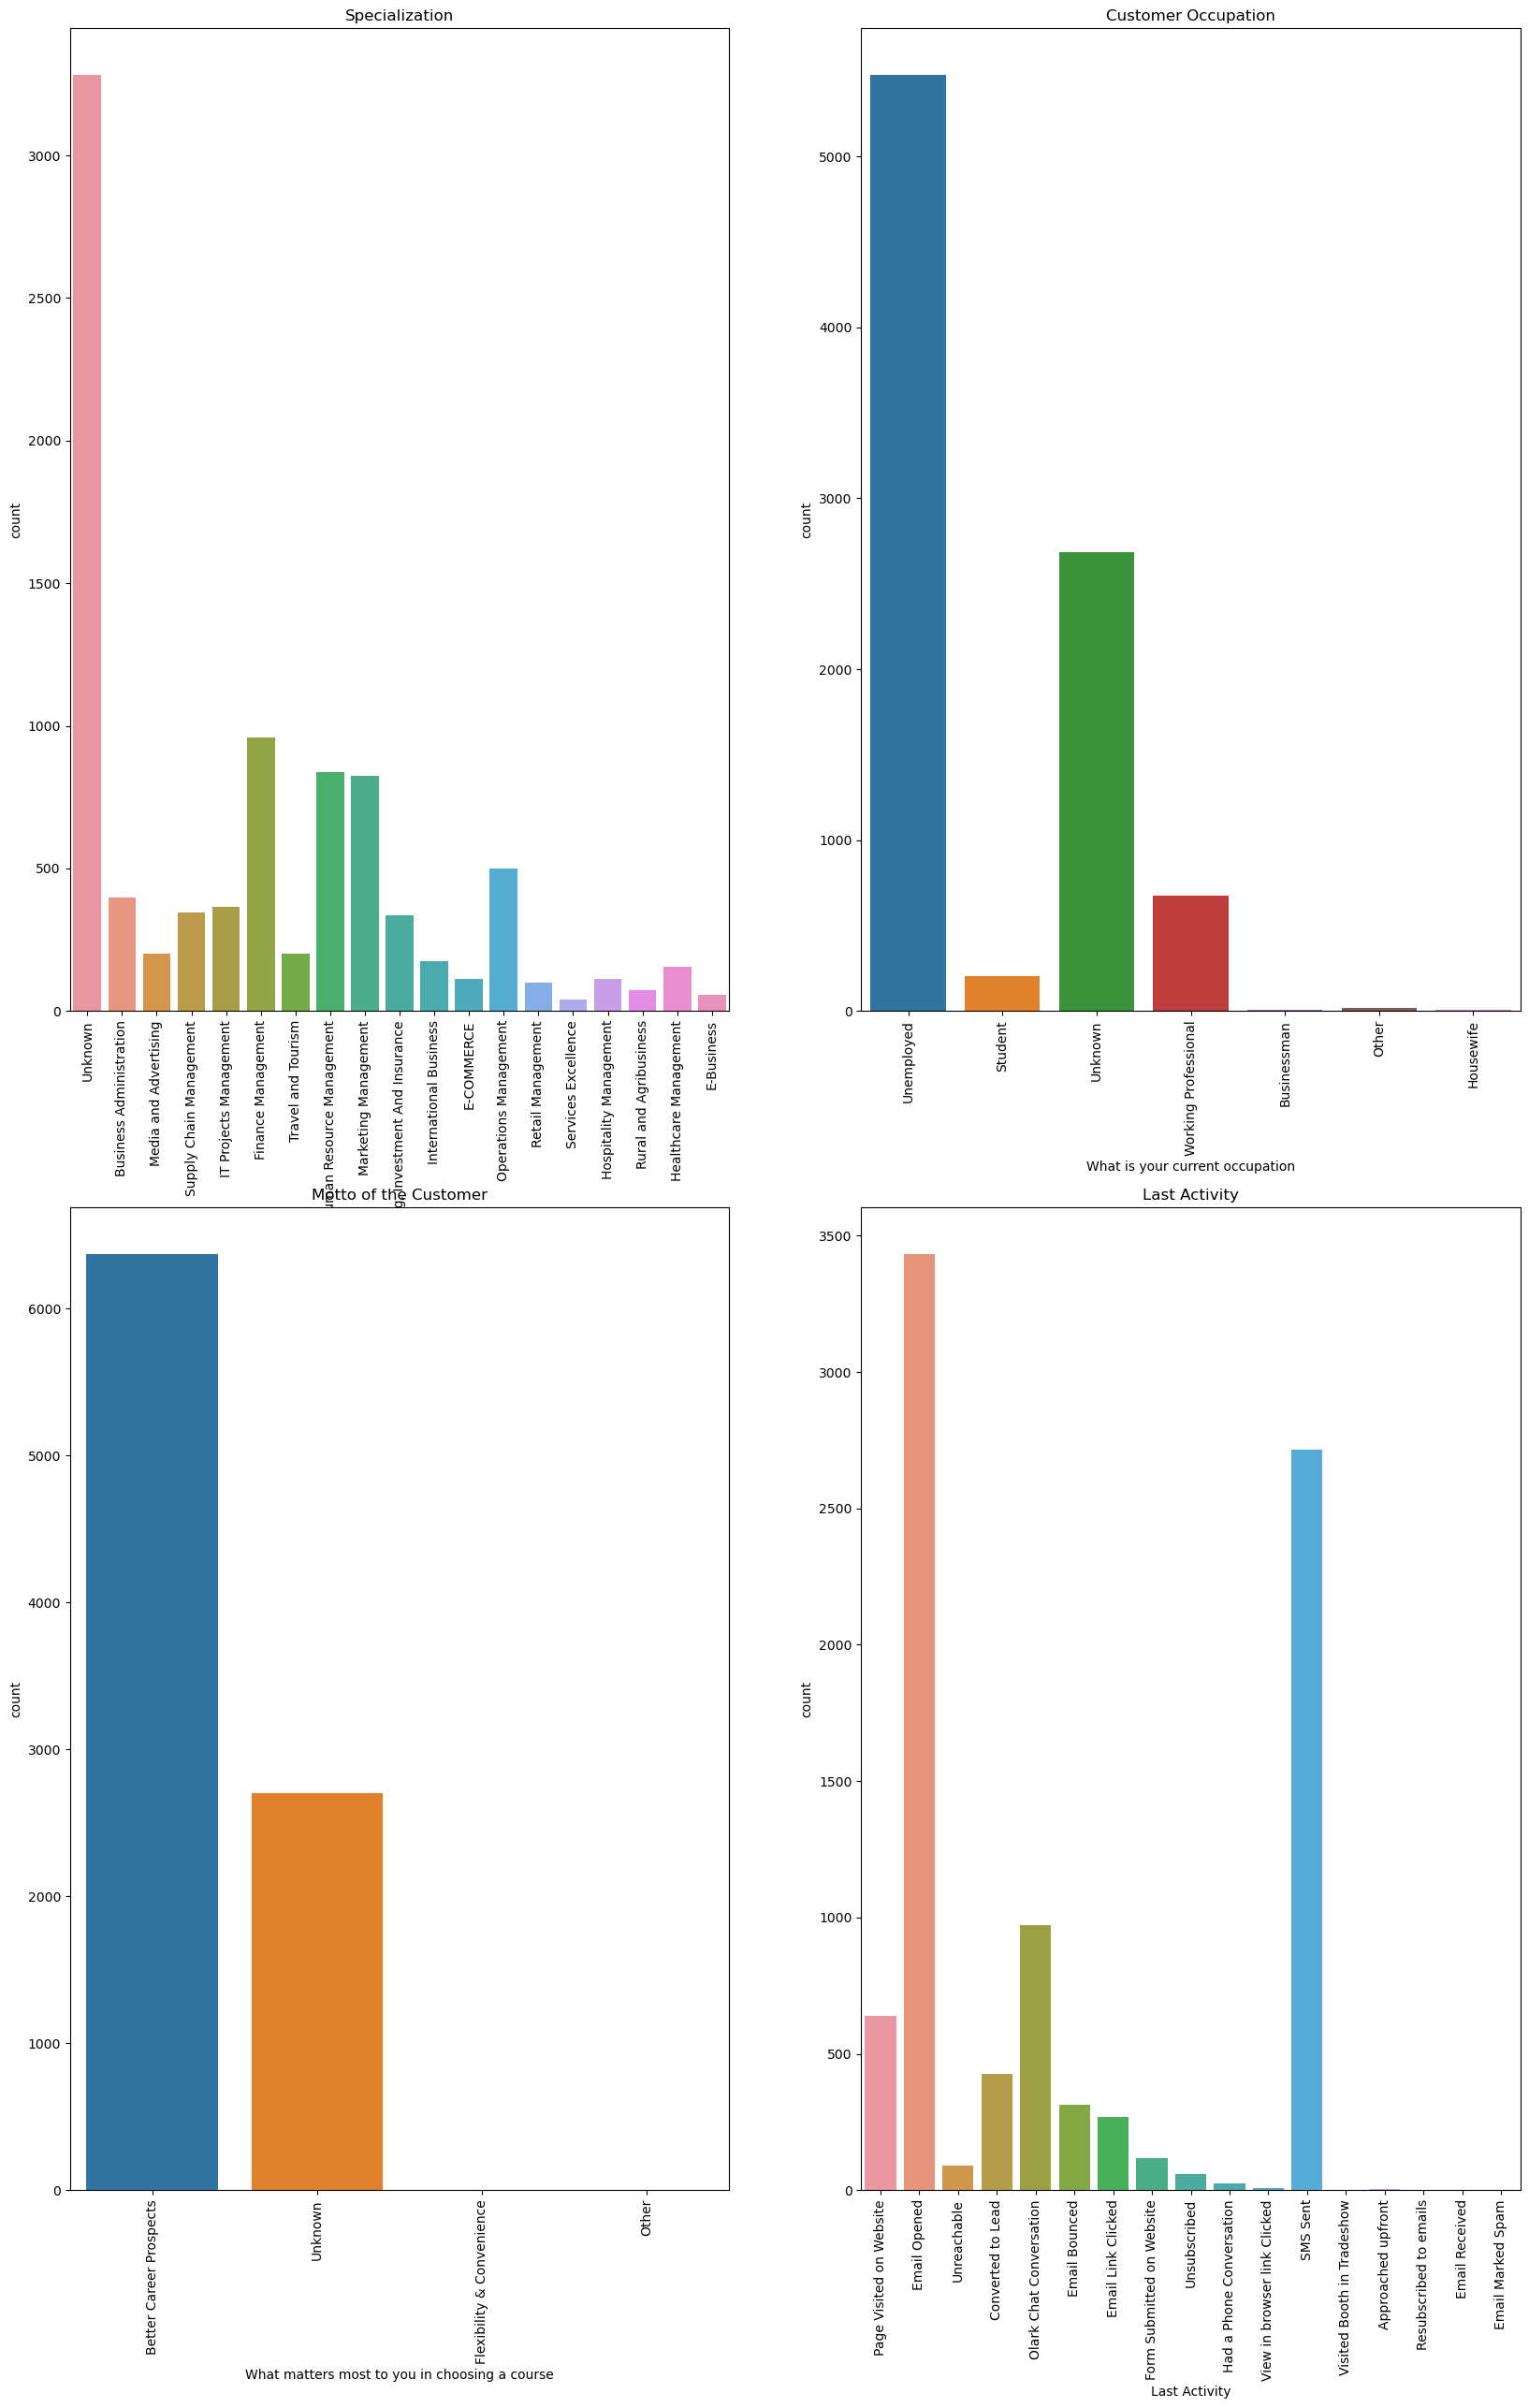

In [183]:
plt.figure(figsize=(20, 30))
plt.subplot(2, 2, 1)
sns.countplot(x='Specialization', data=df_2)
plt.xticks(rotation=90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(x='What is your current occupation',data=df_2)
plt.xticks(rotation = 90)
plt.title('Customer Occupation')
plt.subplot(2,2,3)
sns.countplot(x='What matters most to you in choosing a course',data=df_2)
plt.xticks(rotation = 90)
plt.title('Motto of the Customer')
plt.subplot(2,2,4)
sns.countplot(x='Last Activity',data=df_2)
plt.xticks(rotation = 90)
plt.title('Last Activity')
plt.show()

## Inference

##### Apart from unknown most of the customers are from Finance background
##### Most of the Leads are unemployed, may be most of the Leads are just graduated.
#####  Leads are searching for  a better course for a better career
##### The last activity performed by customer are Email opened and SMS sent

### Analysing target variable

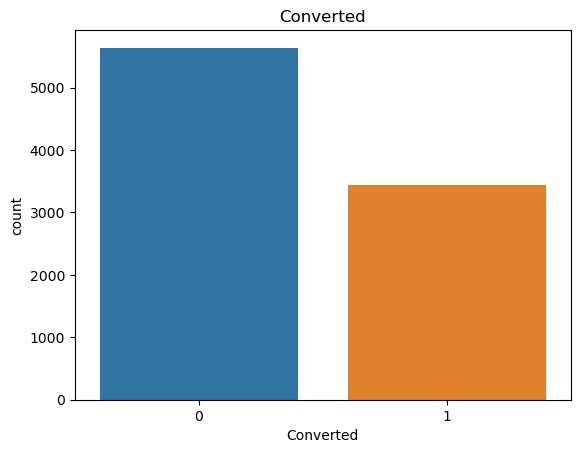

In [184]:
sns.countplot(x='Converted',data=df_2)
plt.title("Converted")
plt.show()

## Inference

##### Company couldn' t convert most of the leads.

# Univariate Analysis on Numerical Variables

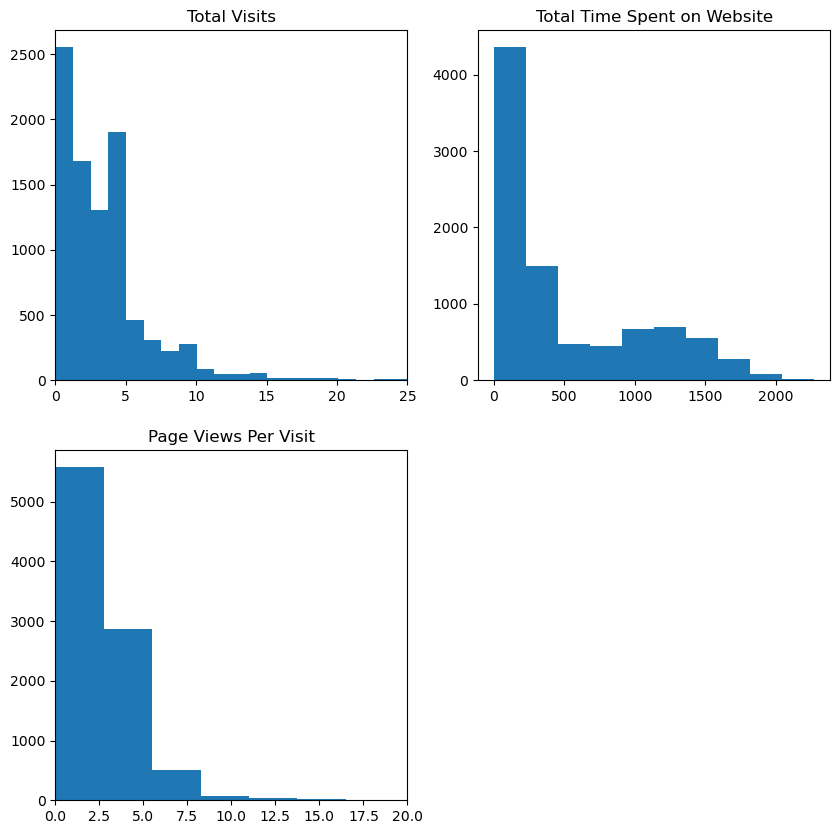

In [185]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## Inference

##### Total visits has gone up to 2500
##### Time spent on website is more than 4000

# Bivariate Analysis

### Analysing the categorical variables with target variable

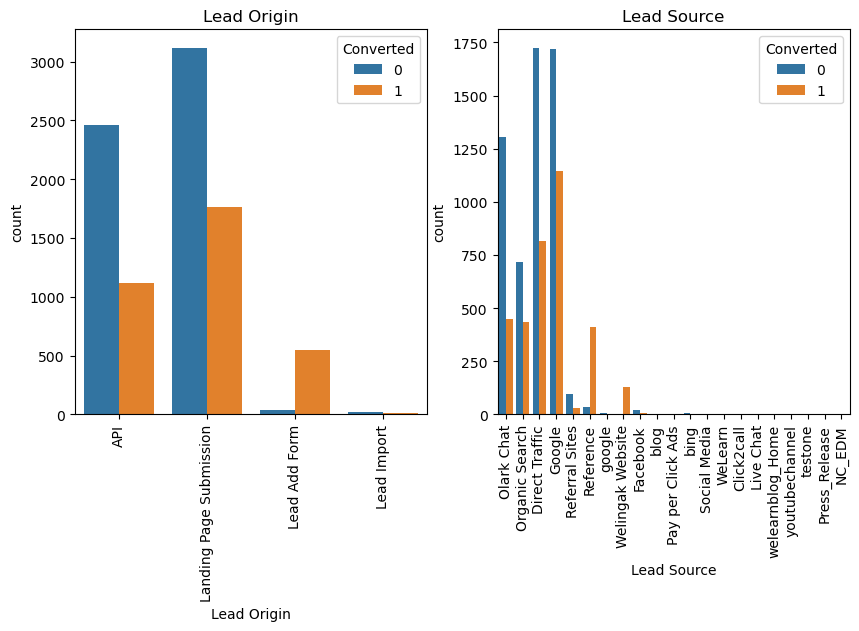

In [186]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_2)
plt.xticks( rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_2)
plt.xticks(rotation = 90)
plt.title('Lead Source')
plt.show()

## Inference

##### Most of the Landing Page Submission in Lead Origin have been converted and they are also the ones who did not get converted . Lead Add Form customers have been converted then non-converted.
##### Most of the Leads who has reached out the company thorugh google have been converted and at the same time they were the ones who has not been converted. Also, Direct Traffic and google has amount of Leads who were not converted. But google is the best source to convert the leads.

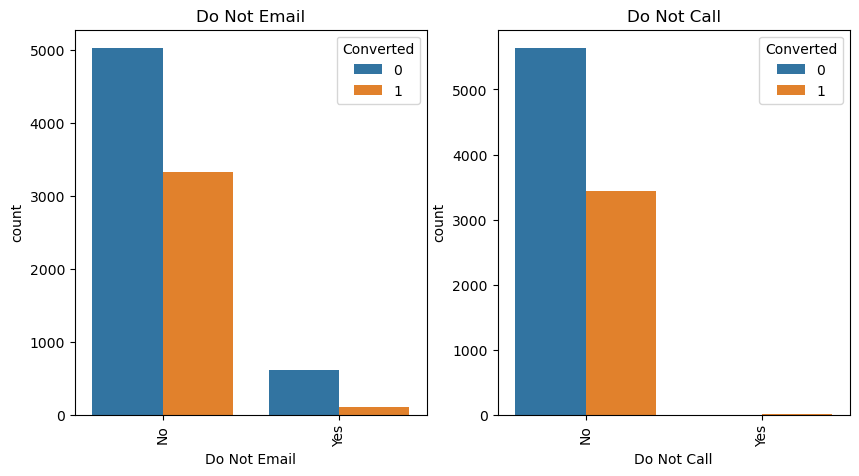

In [187]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_2)
plt.xticks(rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_2)
plt.xticks(rotation = 90)
plt.title('Do Not Call')
plt.show()

## Inference

##### Customers who have choosen No option for 'Do Not Email' has not been converted. Also, the Leads who has chosen No option have been converted. There are less customers who have been coverted via Email.
##### Customers who have choosen No option for 'Do Not Call has not been converted. Also, the Leads who has chosen No option have been converted. Only Few customers have been converted with Do Not Call ' Yes' option.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

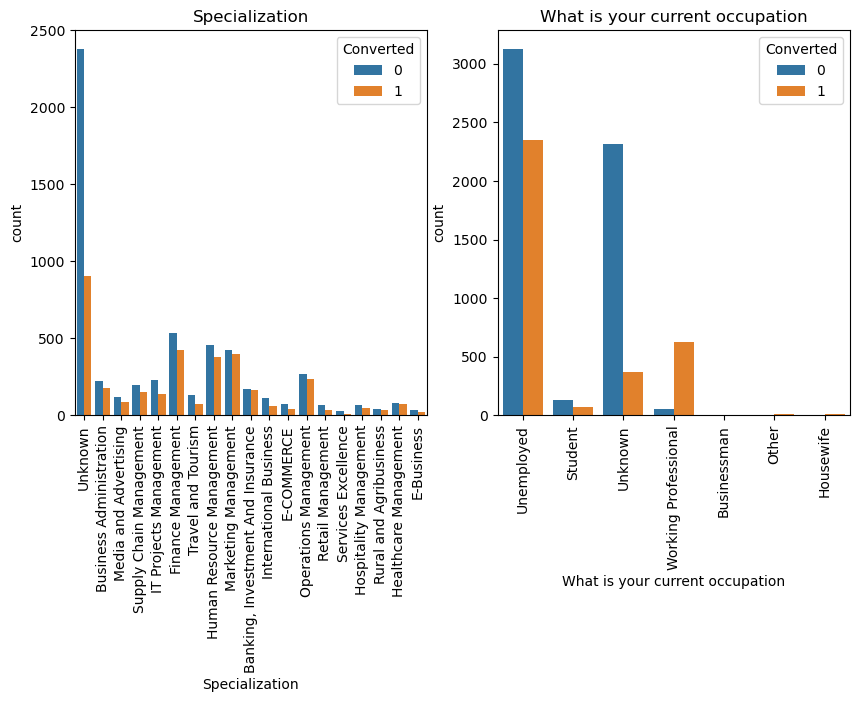

In [189]:
# Analysing the specialization and What is your current occupation with the target variable

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_2)
plt.xticks(rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_2)
plt.xticks(rotation = 90)
plt.title('What is your current occupation')
plt.show()

## Inference

##### Most of the specialization data is unknown. Finance and Market domian has been coverted as well as not converted. But seems like Finance and Market management are more interested in the course.
##### Unemployed are more ineterested in course. So, we can target unemployed more.

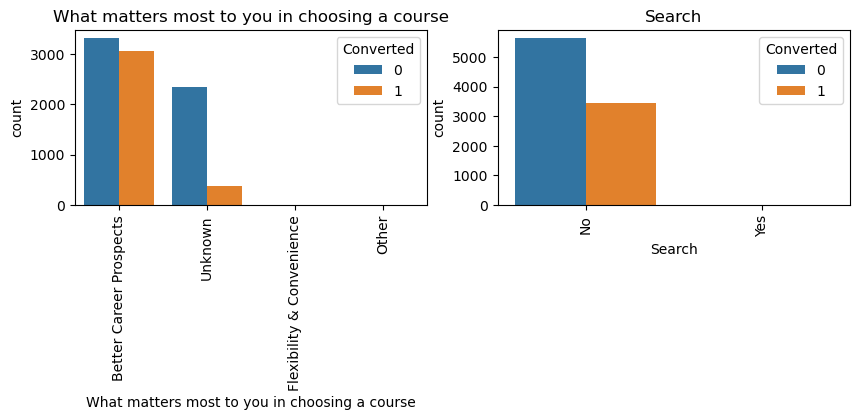

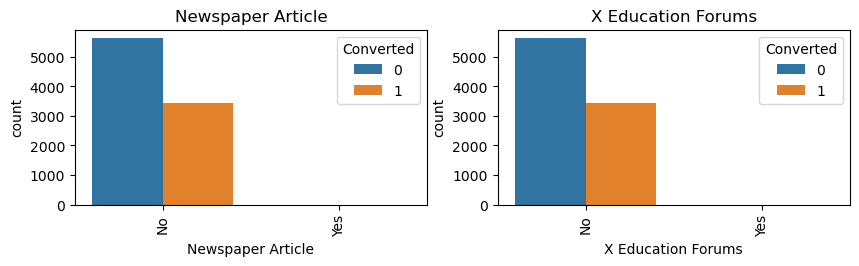

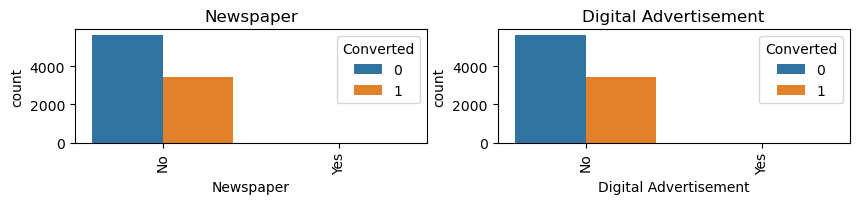

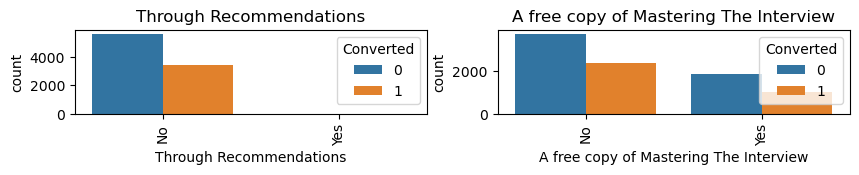

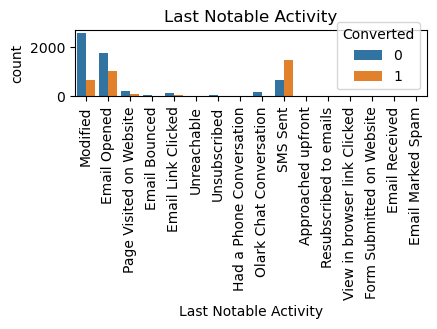

In [190]:
# Analysing other variables with the target variables.

plt.figure(figsize = (10,5))

plt.subplot(2,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,2)
sns.countplot(x='Search', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

plt.figure(figsize = (10,5))
plt.subplot(2,2,3)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(2,2,4)
sns.countplot(x='X Education Forums', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

plt.figure(figsize = (10,5))
plt.subplot(3,2,5)
sns.countplot(x='Newspaper', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(3,2,6)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

plt.figure(figsize = (10,5))
plt.subplot(4,2,7)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(4,2,8)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

plt.figure(figsize = (10,5))
plt.subplot(5,2,9)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

## Inference

##### Most of the Leads are in search of course for better career opportunities.
##### Newspaper Articles can be best way to market the company. 
##### Education Forums and Digital could also help in marketing the company.

## Checking the correlation between the numerical variables.



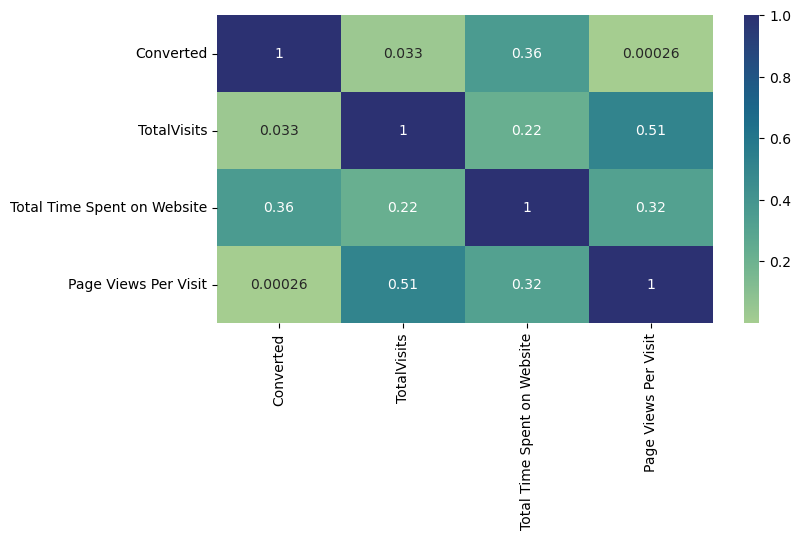

In [191]:
# Checking the correlation.


plt.figure(figsize=(8,4))
sns.heatmap(df_2.corr(),cmap='crest',annot=True)
plt.show()

## Inference

##### There is nothing much we can tell from this correlation

#### Checking the outliers

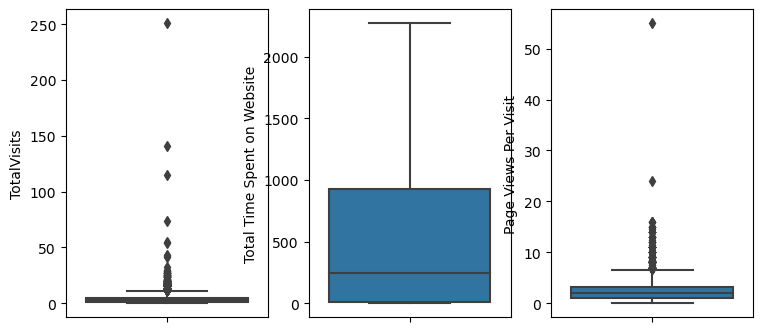

In [192]:
cols = df_2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
plt.figure(figsize=(12,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_2)
    i+=1

plt.show()

## Inference

##### There are no much outliers. So, proceeding further.

# 4.Creating Dummy Variables

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [194]:
# Displaying all the object type variables from the data

df_2.loc[:,df_2.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [195]:
# Creating dummy variables

df_dummy = pd.get_dummies(df_2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe

df_final = pd.concat([df_2, df_dummy], axis=1)
df_final

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  \
0                     0.00  Page Visited on Website        Unknown   
1                     2.50             Email Opened          India   
2                     2.00             Email Opened          India   
3                     1.00              Unreachable          India   
4                     1.00        Converted to Lead          India   
...                    ...                      ...            ...   
9235                  2.67        Email Marked Spam  Outside India   
9236                  2.00                 SMS Sent          India   
9237                  2.00                 SMS Sent          India   
9238                  3.00                 SMS Sent          India   
9239                  3.00                 SMS Sent  Outside India   

                 Specialization What is your current occupation  \
0                       Unknown                      Unemployed   
1                       Unknown                      Unemployed   
2       Business Administration                         Student   
3         Media and Advertising                      Unemployed   
4                       Unknown                      Unemployed   
...                         ...                             ...   
9235     IT Projects Management                      Unemployed   
9236      Media and Advertising                      Unemployed   
9237    Business Administration                      Unemployed   
9238  Human Resource Management                         Unknown   
9239    Supply Chain Management                      Unemployed   

     What matters most to you in choosing a course Search Newspaper Article  \
0                          Better Career Prospects     No                No   
1                          Better Career Prospects     No                No   
2                          Better Career Prospects     No                No   
3                          Better Career Prospects     No                No   
4                          Better Career Prospects     No                No   
...                                            ...    ...               ...   
9235                       Better Career Prospects     No                No   
9236                       Better Career Prospects     No                No   
9237                       Better Caree

In [196]:
## Dropping all the variables for the which the dummy variables have created.

df_final = df_final.drop(['What is your current occupation','What is your current occupation_Unknown','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_Unknown','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [197]:
df_final.shape

(9074, 82)

In [198]:
df_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness 

# 4. Train-Test Split

In [199]:
# Dropping target variable from the data.

X = df_final.drop(['Converted'],axis=1)

In [200]:
# Keeping the target variable in y

y = df_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [201]:
# Splitting the dataset into 70-30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [202]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1289          2.0                         1392                   2.0   
3604          0.0                            0                   0.0   
5584          6.0                         1708                   6.0   
7679          0.0                            0                   0.0   
7563          2.0                         1790                   2.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1289                                    1                          0   
3604                                    0                          0   
5584                                    1                          0   
7679                                    0                          0   
7563                                    1                          0   

      Lead Origin_Lead Import  Specialization_Business Administration  \
1289                        0                                       0   
3604                        0                                       0   
5584                        0                                       0   
7679                        0                                       0   
7563                        0                                       0   

      Specialization_E-Business  Specialization_E-COMMERCE  \
1289                          0                          0   
3604                          0                          0   
5584                          0                          0   
7679                          0                          0   
7563                          0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
1289                                  1                                     0   
3604                                  0                                     0   
5584                                  0                                     0   
7679                                  0                                     0   
7563                                  0                                     0   

      Specialization_Hospitality Management  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      1   

      Specialization_Human Resource Management  \
1289                                         0   
3604                                         0   
5584                                         1   
7679                                         0   
7563                                         0   

      Specialization_IT Projects Management  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      0   

      Specialization_International Business  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      0   

      Specialization_Marketing Management  \
1289                                    0   
3604                                    0   
5584                                    0   
7679                                    0   
7563                                    0   

      Specialization_Media and Advertising  \
1289                                     0   
3604                                     0   
5584                                     0   
7679                                     0   
7563                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
1289                                     0                     

In [203]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8308          5.0                          947                   5.0   
7212          4.0                            3                   4.0   
2085          0.0                            0                   0.0   
4048          4.0                         1402                   2.0   
4790          4.0                           12                   2.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8308                                    1                          0   
7212                                    1                          0   
2085                                    0                          1   
4048                                    1                          0   
4790                                    1                          0   

      Lead Origin_Lead Import  Specialization_Business Administration  \
8308                        0                                       1   
7212                        0                                       0   
2085                        0                                       0   
4048                        0                                       1   
4790                        0                                       0   

      Specialization_E-Business  Specialization_E-COMMERCE  \
8308                          0                          0   
7212                          0                          0   
2085                          0                          0   
4048                          0                          0   
4790                          0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
8308                                  0                                     0   
7212                                  0                                     0   
2085                                  0                                     0   
4048                                  0                                     0   
4790                                  0                                     0   

      Specialization_Hospitality Management  \
8308                                      0   
7212                                      0   
2085                                      0   
4048                                      0   
4790                                      0   

      Specialization_Human Resource Management  \
8308                                         0   
7212                                         0   
2085                                         0   
4048                                         0   
4790                                         0   

      Specialization_IT Projects Management  \
8308                                      0   
7212                                      0   
2085                                      0   
4048                                      0   
4790                                      0   

      Specialization_International Business  \
8308                                      0   
7212                                      0   
2085                                      0   
4048                                      0   
4790                                      0   

      Specialization_Marketing Management  \
8308                                    0   
7212                                    0   
2085                                    0   
4048                                    0   
4790                                    0   

      Specialization_Media and Advertising  \
8308                                     0   
7212                                     0   
2085                                     0   
4048                                     0   
4790                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8308                                     0                     

In [204]:
y_train.head()

1289    1
3604    0
5584    0
7679    0
7563    0
Name: Converted, dtype: int64

### Scaling

In [205]:
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1289     0.014184                     0.612676              0.083333   
3604     0.000000                     0.000000              0.000000   
5584     0.042553                     0.751761              0.250000   
7679     0.000000                     0.000000              0.000000   
7563     0.014184                     0.787852              0.083333   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1289                                    1                          0   
3604                                    0                          0   
5584                                    1                          0   
7679                                    0                          0   
7563                                    1                          0   

      Lead Origin_Lead Import  Specialization_Business Administration  \
1289                        0                                       0   
3604                        0                                       0   
5584                        0                                       0   
7679                        0                                       0   
7563                        0                                       0   

      Specialization_E-Business  Specialization_E-COMMERCE  \
1289                          0                          0   
3604                          0                          0   
5584                          0                          0   
7679                          0                          0   
7563                          0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
1289                                  1                                     0   
3604                                  0                                     0   
5584                                  0                                     0   
7679                                  0                                     0   
7563                                  0                                     0   

      Specialization_Hospitality Management  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      1   

      Specialization_Human Resource Management  \
1289                                         0   
3604                                         0   
5584                                         1   
7679                                         0   
7563                                         0   

      Specialization_IT Projects Management  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      0   

      Specialization_International Business  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      0   

      Specialization_Marketing Management  \
1289                                    0   
3604                                    0   
5584                                    0   
7679                                    0   
7563                                    0   

      Specialization_Media and Advertising  \
1289                                     0   
3604                                     0   
5584                                     0   
7679                                     0   
7563                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
1289                                     0                     

### Checking the correlation amongst all the variables

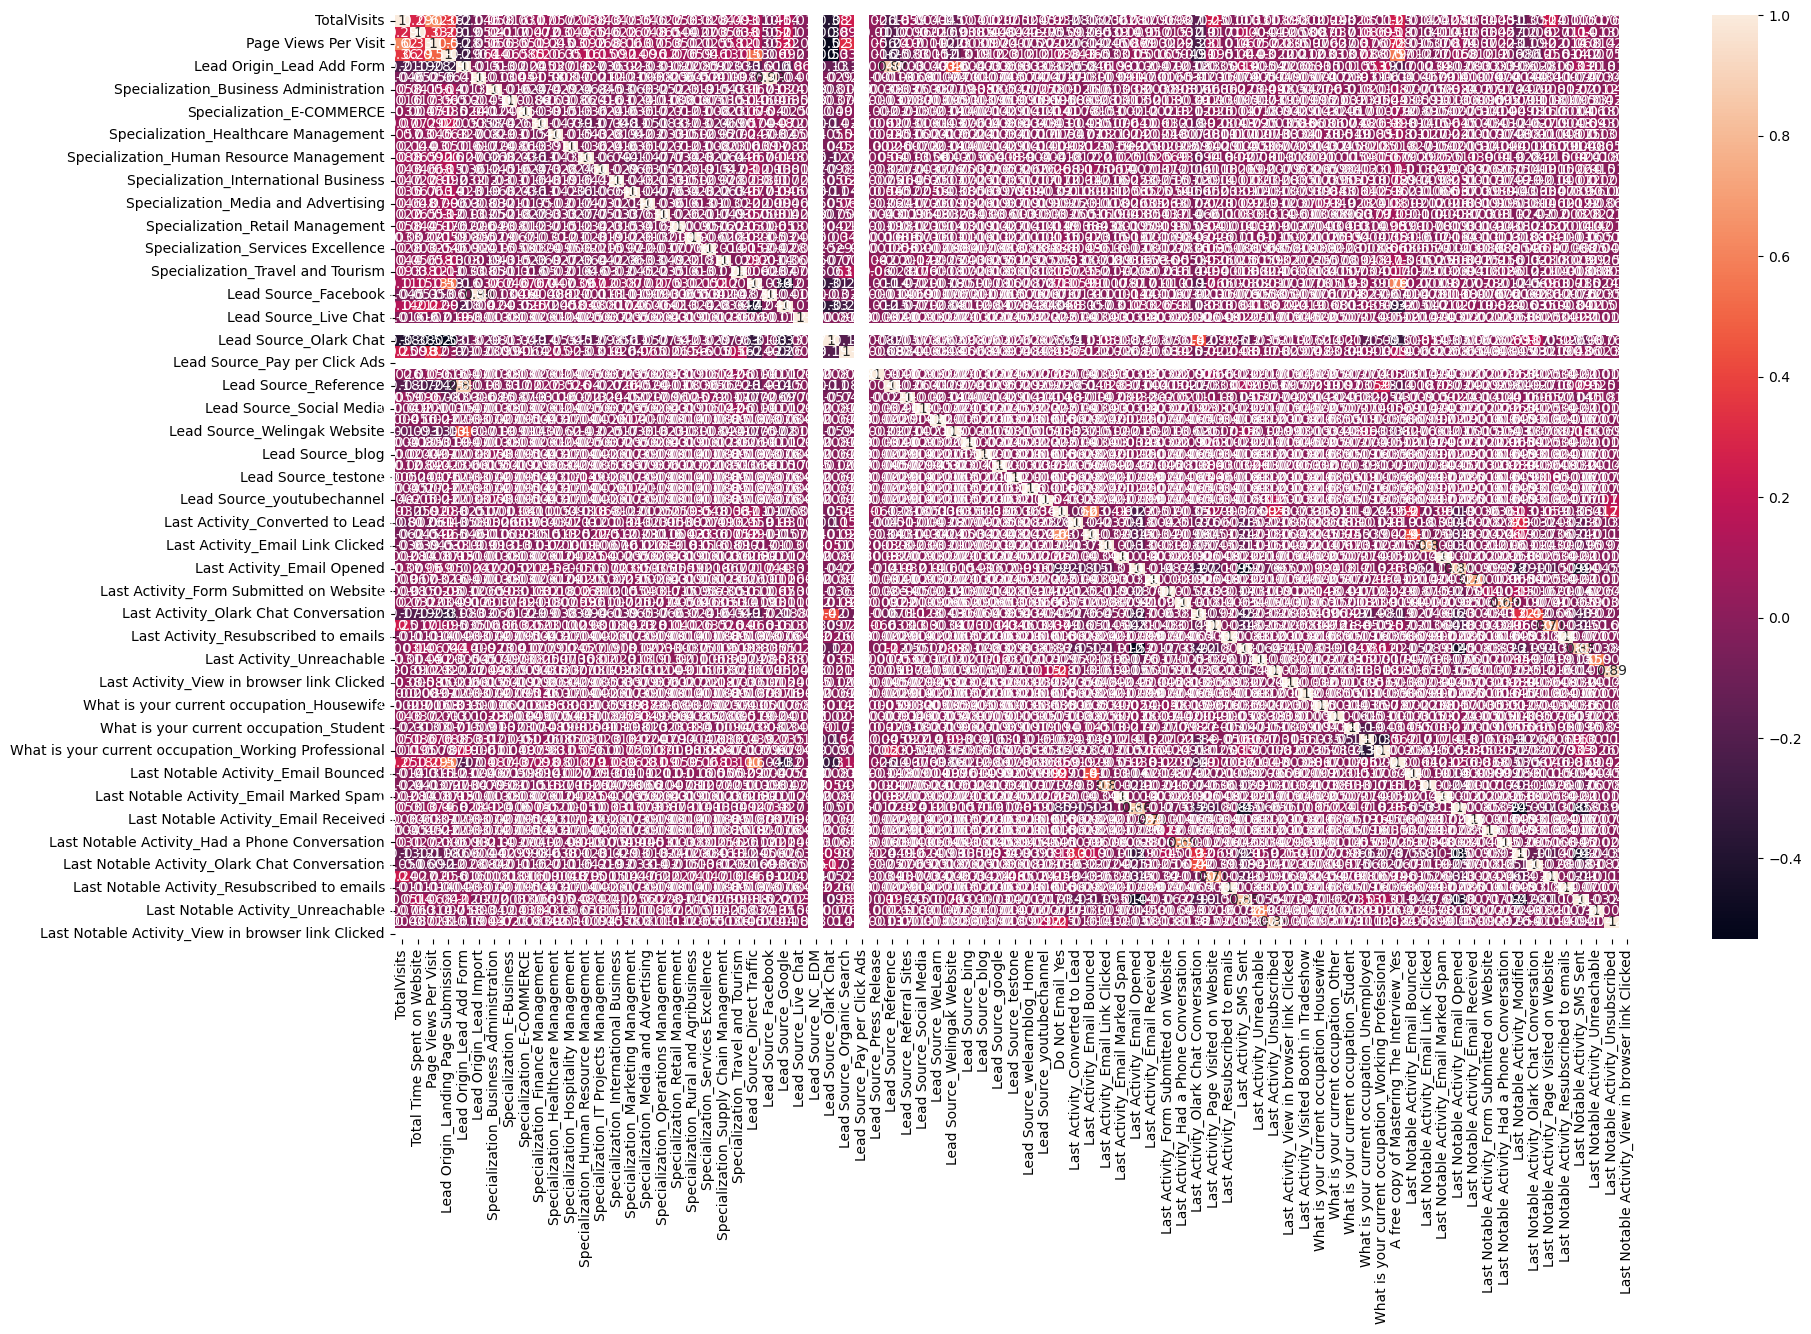

In [206]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(),annot=True) #cmap='crest'#,
plt.show()

### We will drop variables slowly after calculating RFE

# 5. Model Building

In [207]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [208]:
#Cutting down number of variables to 15

# Specify the number of features to select (15 in this case)
num_features_to_select = 15

# Create RFE object
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)

# Fit the RFE model to your training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [209]:
#Columns by RFE 


list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 23),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 45),
 ('Specialization_Human Resource Management', False, 31),
 ('Specialization_IT Projects Management', False, 28),
 ('Specialization_International Business', False, 38),
 ('Specialization_Marketing Management', False, 22),
 ('Specialization_Media and Advertising', False, 44),
 ('Specialization_Operations Management', False, 27),
 ('Specialization_Retail Management', False, 64),
 ('Specialization_Rural and Agribusiness', False, 24),
 ('Specialization_Serv

In [210]:
# Put all the columns selected by RFE in the variable 'Rfe_col'

rfe_col = X_train.columns[rfe.support_]

In [211]:
print(rfe_col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


### Checking the p-values and VIFs

In [212]:
# Putting all the RFE chosen variables in X_train

X_train = X_train[rfe_col]

In [213]:
# Checking the X_train data

X_train.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
1289     0.014184                     0.612676                          0   
3604     0.000000                     0.000000                          0   
5584     0.042553                     0.751761                          0   
7679     0.000000                     0.000000                          0   
7563     0.014184                     0.787852                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
1289                       0                             0                 0   
3604                       1                             0                 0   
5584                       0                             0                 1   
7679                       1                             0                 0   
7563                       0                             0                 1   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
1289                                      0                       0   
3604                                      0                       0   
5584                                      0                       0   
7679                                      0                       0   
7563                                      0                       0   

      What is your current occupation_Housewife  \
1289                                          0   
3604                                          0   
5584                                          0   
7679                                          0   
7563                                          0   

      What is your current occupation_Other  \
1289                                      0   
3604                                      0   
5584                                      0   
7679                                      0   
7563                                      0   

      What is your current occupation_Student  \
1289                                        0   
3604                                        0   
5584                                        0   
7679                                        0   
7563                                        0   

      What is your current occupation_Unemployed  \
1289                                           1   
3604                                           0   
5584                                           0   
7679                                           0   
7563                                           1   

      What is your current occupation_Working Professional  \
1289                                                  0      
3604                                                  0      
5584                                                  0      
7679                                                  0      
7563                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
1289                                               0   
3604                                               0   
5584                                               0   
7679                                               0   
7563                                               0   

      Last Notable Activity_Unreachable  
1289                                  0  
3604                                  0  
5584                                  0  
7679                                  0  
7563                                  0

In [214]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Mon, 19 Feb 2024   Deviance:                       5270.1
Time:                        11:53:54   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_Lead Add Form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_Olark Chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_Welingak Website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_Olark Chat Conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_SMS Sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_Housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_Other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_Student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_Unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_Working Professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_Had a Phone Conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

### calculating VIF

In [215]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  2.30
1                         Total Time Spent on Website  2.07
0                                         TotalVisits  1.85
2                           Lead Origin_Lead Add Form  1.59
7                              Last Activity_SMS Sent  1.54
3                              Lead Source_Olark Chat  1.51
6               Last Activity_Olark Chat Conversation  1.37
12  What is your current occupation_Working Profes...  1.32
4                        Lead Source_Welingak Website  1.31
5                                    Do Not Email_Yes  1.06
10            What is your current occupation_Student  1.05
9               What is your current occupation_Other  1.01
14                  Last Notable Activity_Unreachable  1.01
8           What is your current occupation_Housewife  1.00
13     Last Notable Activity_Had a Phone Conversation  1.00

## All the VIF values seem less than 5 but, p-values doesn' t seem fine.


#### Dropping 'Last Notable Activity_Had a Phone Conversation'

In [216]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [217]:
## Refitting the model with new variables


X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Mon, 19 Feb 2024   Deviance:                       5285.6
Time:                        11:53:54   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_Lead Add Form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_Olark Chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_Welingak Website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_Olark Chat Conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_SMS Sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_Housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_Other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_Student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_Unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_Working Professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_Unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [218]:
# VIF  for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_Lead Add Form  1.59
7                              Last Activity_SMS Sent  1.54
3                              Lead Source_Olark Chat  1.51
6               Last Activity_Olark Chat Conversation  1.37
12  What is your current occupation_Working Profes...  1.32
4                        Lead Source_Welingak Website  1.31
5                                    Do Not Email_Yes  1.06
10            What is your current occupation_Student  1.05
9               What is your current occupation_Other  1.01
13                  Last Notable Activity_Unreachable  1.01
8           What is your current occupation_Housewife  1.00

#### VIF values look fine but, p-value of 'What is your current occupation_Housewife' is high. So, dropping of this variable

In [219]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [220]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Mon, 19 Feb 2024   Deviance:                       5302.6
Time:                        11:53:55   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_Lead Add Form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_Olark Chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_Welingak Website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_Olark Chat Conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_SMS Sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_Other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_Student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_Unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_Unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [221]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_Lead Add Form  1.58
7                              Last Activity_SMS Sent  1.53
3                              Lead Source_Olark Chat  1.51
6               Last Activity_Olark Chat Conversation  1.37
11  What is your current occupation_Working Profes...  1.32
4                        Lead Source_Welingak Website  1.31
5                                    Do Not Email_Yes  1.06
9             What is your current occupation_Student  1.05
8               What is your current occupation_Other  1.01
12                  Last Notable Activity_Unreachable  1.01

### Now all the VIF values look good and p-values are less than 0.05. 

# 6. Prediction

In [222]:
# Predicting probabilities on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64

In [223]:
# Reshaping 'y_train_pred' to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [224]:
# Data frame with convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.647883
1          0         0.133180
2          0         0.232946
3          0         0.133180
4          0         0.495090

In [225]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.647883          1
1          0         0.133180          0
2          0         0.232946          0
3          0         0.133180          0
4          0         0.495090          0

# 7.Model Evaluation

In [226]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [227]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [228]:
# Checking overall accuracy 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

### Accuracy is 81% which is a very good value.

In [229]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1]

# Substituting the value of false negatives
FN = confusion[1,0]

##### Calculating Sensitivity

In [230]:
TP/(TP+FN)

0.6958469055374593

##### calculating Specificity



In [231]:
TN/(TN+FP)

0.8824133504492939

### Inference

Accuracy - 81%
Sensitivity - 70%
Speficity - 88%
 with cut-off 0.5

# 7. ROC Curve - Optimising Cut-Off

In [232]:
# ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [233]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

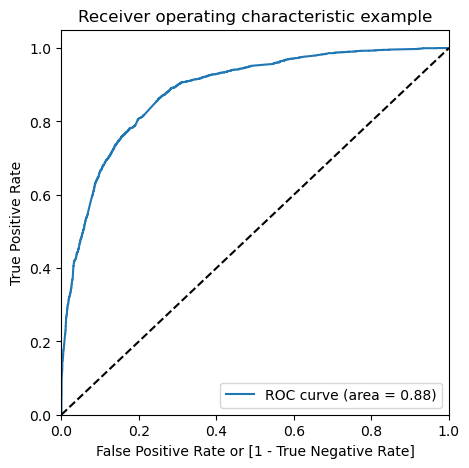

In [234]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Inference

##### Area under ROC curve is 0.88, which is a very good value.

In [235]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [236]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

prob  accuracy  sensitivity  specificity
0.0   0.0  0.386711     1.000000     0.000000
0.1   0.1  0.577232     0.983306     0.321181
0.2   0.2  0.758306     0.912866     0.660847
0.3   0.3  0.788852     0.872557     0.736072
0.4   0.4  0.809321     0.765879     0.836714
0.5   0.5  0.810266     0.695847     0.882413
0.6   0.6  0.802708     0.627850     0.912965
0.7   0.7  0.773579     0.504072     0.943517
0.8   0.8  0.753582     0.413681     0.967908
0.9   0.9  0.706660     0.260179     0.988190

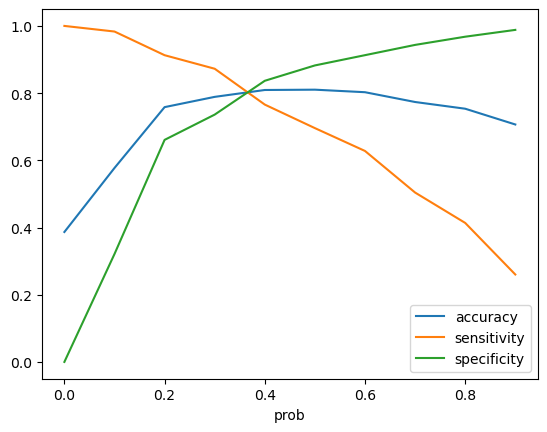

In [237]:
# Displaying the same via graph

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### Inference

##### From the graph we can say that the optimal cut-off would be at 0.35

In [238]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [239]:
# Overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [240]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [241]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [242]:
# Sensitivity

TP/(TP+FN)

0.8037459283387622

In [243]:
# Specificity

TN/(TN+FP)

0.8028241335044929

### With the current cut-off 0.35 the accuracy, sensitivity, specificity is 80%

# 8. Prediction on Test Set

In [244]:
# Scaling on numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [245]:
# Substituting all the columns in the final train model

col = X_train.columns

In [246]:
# Copying the columns in X_train for X_test.

X_test = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8308    1.0     0.035461                     0.416813   
7212    1.0     0.028369                     0.001320   
2085    1.0     0.000000                     0.000000   
4048    1.0     0.028369                     0.617077   
4790    1.0     0.028369                     0.005282   
...     ...          ...                          ...   
3261    1.0     0.000000                     0.000000   
8179    1.0     0.170213                     0.148768   
6236    1.0     0.000000                     0.000000   
5240    1.0     0.078014                     0.458627   
7243    1.0     0.035461                     0.499560   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
8308                          0                       0   
7212                          0                       0   
2085                          1                       0   
4048                          0                       0   
4790                          0                       0   
...                         ...                     ...   
3261                          0                       1   
8179                          0                       0   
6236                          0                       1   
5240                          0                       0   
7243                          0                       0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
8308                             0                 0   
7212                             0                 0   
2085                             1                 0   
4048                             0                 0   
4790                             0                 0   
...                            ...               ...   
3261                             0                 0   
8179                             0                 0   
6236                             0                 0   
5240                             0                 0   
7243                             0                 0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
8308                                      0                       0   
7212                                      0                       1   
2085                                      0                       0   
4048                                      0                       1   
4790                                      0                       0   
...                                     ...                     ...   
3261                                      1                       0   
8179                                      0                       1   
6236                                      0                       0   
5240                                      0                       1   
7243                                      0                       0   

      What is your current occupation_Other  \
8308                                      0   
7212                                      0   
2085                                      0   
4048                                      0   
4790                                      0   
...                                     ...   
3261                                      0   
8179                                      0   
6236                                      0   
5240                                      0   
7243                                      0   

      What is your current occupation_Student  \
8308                                        0   
7212                                        0   
2085                                        0   
4048                                        0   
4790                                        0   
...                                       ...   
3261                                        0   
8179                                        0   
6236                                        0   
5240                           

In [247]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.456551
1          1         0.839834
2          1         0.982741
3          1         0.878240
4          0         0.108266

In [248]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.456551                1
1             1         0.839834                1
2             1         0.982741                1
3             1         0.878240                1
4             0         0.108266                0
...         ...              ...              ...
2718          1         0.108386                0
2719          0         0.364110                1
2720          0         0.133180                0
2721          1         0.820744                1
2722          1         0.551516                1

[2723 rows x 3 columns]

In [249]:
# Overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [250]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1404,  340],
       [ 183,  796]], dtype=int64)

In [251]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [252]:
# Sensitivity

TP/(TP+FN)

0.8130745658835546

In [253]:
# Specificity

TN/(TN+FP)

0.805045871559633

### With the cut-off of 0.35 the accuracy,sensitivity,speficity is 80%

# 9.Precision-Recall

In [254]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [255]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7886479003230272

In [256]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

### With the cut-off of 0.35 Precision and Recall values are 79% and 70%

## Precision-Recall Trade Off

In [257]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [258]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

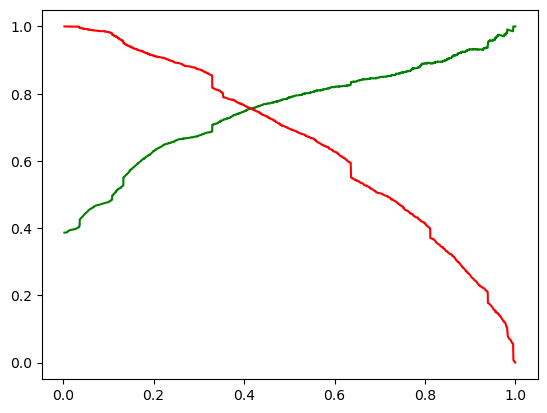

In [259]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [260]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.647883          1    1    1    1    1    1    1    1   
1          0         0.133180          0    1    1    0    0    0    0    0   
2          0         0.232946          0    1    1    1    0    0    0    0   
3          0         0.133180          0    1    1    0    0    0    0    0   
4          0         0.495090          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                1

In [261]:
# Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8110533774208786

In [262]:
# Creating confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3287,  608],
       [ 592, 1864]], dtype=int64)

In [263]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [264]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7540453074433657

In [265]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.758957654723127

### With the cut-off 0.41 Accuracy, Precision, Recall are 81%,75%,76%

# 10.Prediction on Test-set

In [266]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.456551
1          1         0.839834
2          1         0.982741
3          1         0.878240
4          0         0.108266

In [267]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.456551                1
1             1         0.839834                1
2             1         0.982741                1
3             1         0.878240                1
4             0         0.108266                0
...         ...              ...              ...
2718          1         0.108386                0
2719          0         0.364110                0
2720          0         0.133180                0
2721          1         0.820744                1
2722          1         0.551516                1

[2723 rows x 3 columns]

In [268]:
# Overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8152772677194271

In [269]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1470,  274],
       [ 229,  750]], dtype=int64)

In [270]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [271]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.732421875

In [272]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7660878447395302

### With the current cut-off 0.41 the Precision and Recall are 73% and 77%

# Conclusion

There were lot of Unknown values in the dataset.

Leads have known about the company and course through Google the most. Direct Traffic and Olark Chat has also been the source for the Leads to know about the course.

Most of the Leads are from Finance, Marketing, and Investment and Insurance Specialization.

Leads who are currently unemployed have reached out this company.

Main Motto of the Leads is to better their career by upskilling themselves.

Last Activity of the Leads are Email opened and SMS sent. So, it is better to communicate with them this way. 

From the Dataset, the target variable shows that most of the Leads were not converted.

Leads who has landed on this course by Google and Direct Traffic source can be targetted to convert them.

Leads from Finance, HR, marketing department have been converted.

Leads who are currently UnEmployed have been converted.

Leads who are in search of better career options were converted. 